In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 999
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [5]:
kc_housing = pd.read_csv('kc_house_data.csv', index_col = 0 )

In [6]:
kc_housing

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [15]:
y = kc_housing['price']

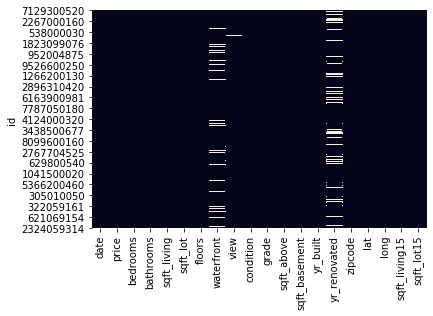

In [17]:
sns.heatmap(kc_housing.isnull(), cbar=False)

In [7]:
kc_housing.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
kc_housing.isnull().mean().round(4)*100

date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64

Plot distribution of sale price

In [59]:
kc_housing["price"].describe().apply(lambda x: format(x, 'f'))

count      21597.000000
mean      540296.573506
std       367368.140101
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

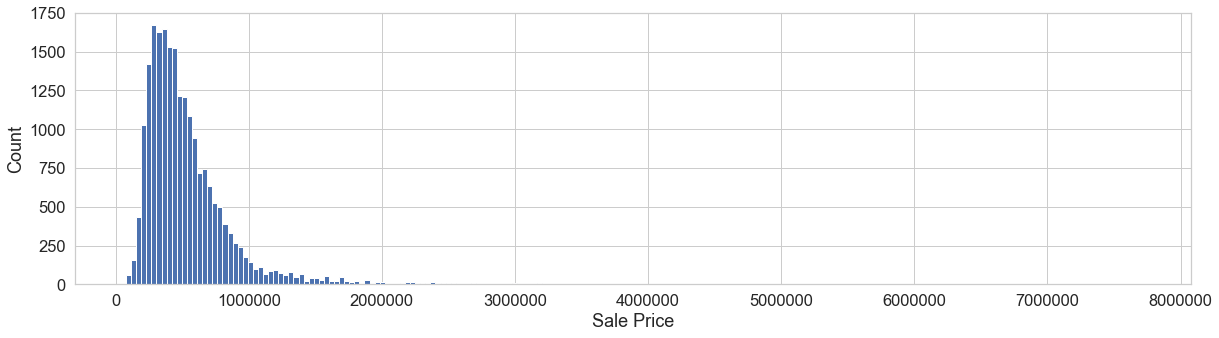

In [71]:
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

Text(0.5, 1.0, 'House Sales Price Distribution')

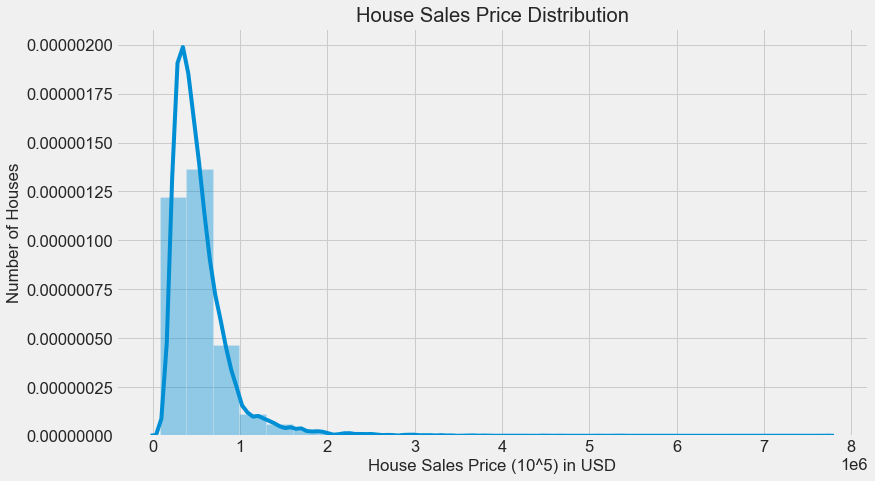

In [74]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(kc_housing.price, bins = 25)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.xlabel("House Sales Price (10^5) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")

Normalize sale price data

(array([1.800e+01, 3.300e+01, 6.900e+01, 1.710e+02, 4.170e+02, 1.032e+03,
        1.999e+03, 2.431e+03, 2.863e+03, 3.022e+03, 2.928e+03, 2.349e+03,
        1.766e+03, 1.082e+03, 4.730e+02, 3.880e+02, 2.450e+02, 1.240e+02,
        9.800e+01, 4.600e+01, 2.700e+01, 6.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00]),
 array([11.26446411, 11.44815478, 11.63184545, 11.81553612, 11.99922679,
        12.18291746, 12.36660813, 12.5502988 , 12.73398948, 12.91768015,
        13.10137082, 13.28506149, 13.46875216, 13.65244283, 13.8361335 ,
        14.01982417, 14.20351485, 14.38720552, 14.57089619, 14.75458686,
        14.93827753, 15.1219682 , 15.30565887, 15.48934954, 15.67304022,
        15.85673089]),
 <a list of 25 Patch objects>)

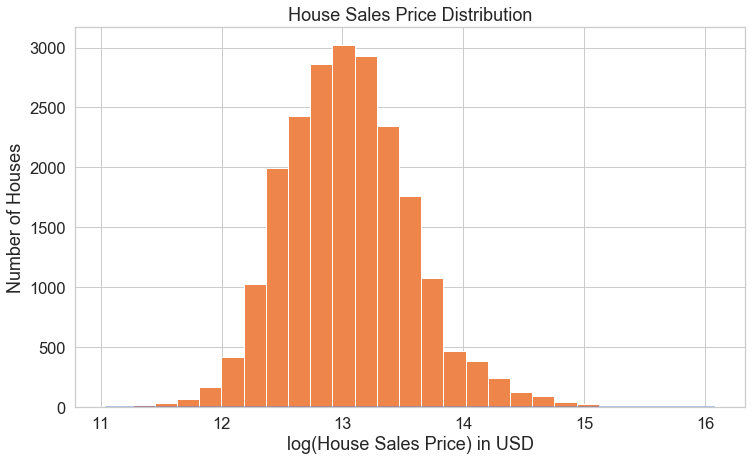

In [73]:
plt.figure(figsize=(12,7))
sns.distplot(np.log(kc_housing.price), bins = 25)
plt.xlabel("log(House Sales Price) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")
plt.hist(np.log(kc_housing.price), bins = 25)

In [76]:
print("Skew is:", np.log(kc_housing.price).skew())
print("Kurtosis: %f" % np.log(kc_housing.price).kurt())

Skew is: 0.4310041773299232
Kurtosis: 0.691049


In [77]:
#Converting SalePrice to log value
kc_housing['logPrice'] = np.log(kc_housing.price)

Taking the logarithm from our target variable, we obtain something similar to a Gaussian distribution. This will ensure that relative errors for cheaper and more expensive homes are treated on an equal footing.

In [80]:
#Correlation
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False)[:7],'\n')
print(corr['price'].sort_values(ascending=False)[-5:],'\n')

price            1.000000
logPrice         0.891745
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64 

sqft_lot15    0.082845
yr_built      0.053953
condition     0.036056
long          0.022036
zipcode      -0.053402
Name: price, dtype: float64 



In [81]:
print(corr['price'].sort_values(ascending=False))

price            1.000000
logPrice         0.891745
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64


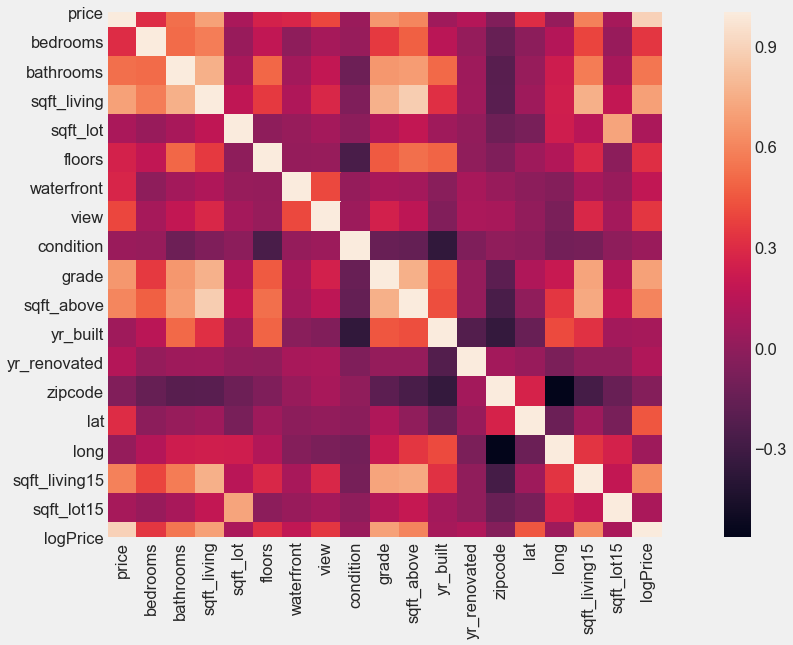

In [82]:
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, square=True)

Where is multicollinearity observed between?